### Divide and Conquer algorithms

In this notebook we will code and analyse the following three divide and conquer algorithms.

1. Counting the number of inversions
2. Matrix multiplication using Strassen's algorithm
3. Computing the closest points together.


#### Counting the Number of inversions

Counting the number of inversions is a measure of how similar (or not similar) are two arrays of numbers. This algorithm is used in recommender systems where the system recommends something (say a movie) to the consumer based on how similar their rating is to other people who rated similarly.

Collaborative Filtering is a technique where we try to find similarities between likes of people. Suppose we want to find similarities of the movie rankings of two people, we will sort movies by ranking of one person's preference and then put ranks given by the second person for those movies. 

For example if your ranked 3 movies A, B and C as your favorite movies and your friend ranked their favorite movies as B A C then between you and the your friend the ranking list becomes 2 1 3 because A is your favorite movie but is second favorite for B. Similarly B is your second favorite movie but your friend's favorite. Both you and your friend's choice match for the third best movie.

From the above example we see that if two people have similar tastes, both the arrays would be identical and there would be no inversions. Higher the number of inversions more are the differences in the preferences.

We will use divide and conquer algorithm like Merge sort to find the number of inversions in an array. The number of inversions in an array A are the number of pairs of indices $(i, j)$ where $i < j$ and $A[i] < A[j]$

An array that is sorted has no inversions, the converse is also true, that is, an array with no inversions is sorted and is not sorted if it has atleast one inversion.

For example, consider the following array

1 3 5 2 4 6

The number of inversions in this array are the following pair of numbers
(3, 2), (5, 2) and (5, 4)

For an array of n numbers, we can have a maxumum of (n - 1) + (n - 2) + .. + 1 number of inversions = $n(n - 1) / 2$ number of inversions.


Let us implement ``counting inversion`` in two different ways. First one is the Bruteforce approach and the second one is using divide and conquer approach that sorts the numbers using Merge Sort along with counting the number of inversions.



In [608]:
def count_inv_brute_force(array):
    num_inversions = 0
    for i in range(len(array)):
        for j in range(i + 1, len(array)):
            if array[i] > array[j]:
                num_inversions += 1
            
    return num_inversions
                

In [609]:
count_inv_brute_force([1, 3, 5, 2, 4, 6])

3

we will now load the two test case files provided [here](http://theory.stanford.edu/~tim/algorithmsilluminated.html) and test our implementation. 

In [610]:
with open('problem3.5test.txt', 'r') as f:
    lines = f.readlines()
prob35test = [int(line.strip()) for line in lines]

with open('problem3.5.txt', 'r') as f:
    lines = f.readlines()
prob35 = [int(line.strip()) for line in lines]


In [611]:
count_inv_brute_force(prob35test)

28


The brute force approach seems to be working fine for small inputs, it will however not work for efficiently on the larger 100000 numbers for counting the inversions. We will now implement the inversion counting piggy backed on merge sort 

In [612]:
def count_inversions_and_sort(array1, array2):
    #
    # Returns a tuple of the number inversions and the sorted array
    #
    res = []
    num_inv = 0
    i = 0
    j = 0
    l1 = len(array1)
    l2 = len(array2)
    for _ in range(l1 + l2):
        if i == l1:
            res += [array2[x] for x in range(j, l2)]
            break
        if j == l2:
            res += [array1[x] for x in range(i, l1)]
            break
            
        if array1[i] < array2[j]:
            res.append(array1[i])
            i += 1
        else:
            res.append(array2[j])
            j += 1
            #If array1[i] is less than array2[j] then all remaining elements of
            #array1 also are guaranteed to be larger than array2[j] since both array1 and array2 
            #are sorted. Thus the number of elements in array1 (including the current) will have split inversions
            #with the current element in array2            
            num_inv += (l1 - i)
            
    return (num_inv, res)
    

In [613]:
def sort_and_count_inversions(array):
    if len(array) == 1:
        return (0, array)
    
    i = len(array) // 2
    l_inv, left = sort_and_count_inversions(array[0:i])
    r_inv, right = sort_and_count_inversions(array[i:])
    split_inv, merged = count_inversions_and_sort(left, right)
    return (l_inv + r_inv + split_inv, merged)

In [614]:
splits, _ = sort_and_count_inversions(prob35test)
print('Number of splits in test array are',splits)

splits, _ = sort_and_count_inversions(prob35)
print('Number of splits in the big array are',splits)


Number of splits in test array are 28
Number of splits in the big array are 2407905288




The divide and conquer method ``sort_and_count_inversions`` is trivial. All we do is to count the number of inversions on the left and right and get the corresponding halves sorted. We then find the split inversions and also merge the two sorted arrays. The total inversions are the number of inversions on the left plus the ones on the right plus the number of split inversions.

The ingenuity lies in the ``count_inversions_and_sort`` function. This function piggy backs on the merge sort function and counts the number of inversions along with sorting the array. The function defined above is pretty straight forward and has comments inline giving explanation.

If we have no inversions in a array A and we receive two halves of an array, then the elements in first half are strictly less than the elements in second half.

The ``sort_and_count_inversions`` splits the input array in two and recursively sorts and counts inversions on the left and right half. The number of tasks at level n doubles than that of level n - 1 and input size given to each of task at level n is half of the input given to a unit on n - 1 level. This is similar to merge sort and given that the routine to sort and count inversions execute in linear time, the count ``sort_and_count_inversions`` also runs in $O(nlogn)$ time

---
#### Strassen's Matrix multiplication Algorithm

Stratten's Matrix multiplication algorithm is a clever divide and conquer approach for multiplying two matrix. Before we see the details of matrix multiplication using Strassen's approach, let us implement matrix multiplication using simple, straight forward approach.

For simplicity of implementing divide and conquer algorithms, we will assume that the matrix square and each side is a power of 2.

In [615]:
def mult_simple(A, B):
    dim = len(A[0])
    Z = [[0 for _ in range(dim)] for _ in range(dim)]
    for i in range(dim):
        for j in range(dim):
            Z[i][j] = sum([A[i][k] * B[k][j] for k in range(dim)])
                
    return Z                

In [616]:
mult_simple([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]], 
                  [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])

[[90, 100, 110, 120],
 [202, 228, 254, 280],
 [314, 356, 398, 440],
 [426, 484, 542, 600]]



Since there are three loops in the above multiplication (with variables i, j and k for each loop counter). The time complexity of a matrix multiplication is $O(n^3)$.

Before we go ahead and implement a recursive divide and conquer algorithm, let us verify our result are correct by using a reference implementation.

In [617]:
import numpy as np
A = np.matrix([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
A * A

matrix([[ 90, 100, 110, 120],
        [202, 228, 254, 280],
        [314, 356, 398, 440],
        [426, 484, 542, 600]])


The divide and conquer approach will break split an $n \times n$ matrix into 4 $\frac{n}{2} \times \frac{n}{2}$ matrix and then multiple then recursively. Let us illustrate then as below

Suppose the bigger matrix X and Y are split in the following two matrices. Then the resulting matrix multiplication is formed by multiplying and these 8 small matrices. This divide and conquer can continue until we get a matrix of size 1 where the recursive divide and conquer stops. This divide and conquer is summarized in the following picture where A, B, C, D and E, F, G, H are smaller matrices of the bigger matrices X and Y respectively.

$$
\begin{pmatrix} 
A & B \\
C & D 
\end{pmatrix}
\times
\begin{pmatrix} 
E & F \\
G & H 
\end{pmatrix}
=
\begin{pmatrix} 
AE + BG  & AF + BH \\
CE + DG & CF + DH 
\end{pmatrix}
$$




In [618]:
def add_matrices(A, B):
    if type(A[0]) is int:
        return [A[i] + B[i] for i in range(len(A))]
    else:
        dim = len(A[0])
        return [[A[i][j] + B[i][j] for j in range(dim)] for i in range(dim)]
    
def sub_matrices(A, B):
    if type(A[0]) is int:
        return [A[i] - B[i] for i in range(len(A))]
    else:
        dim = len(A[0])
        return [[A[i][j] - B[i][j] for j in range(dim)] for i in range(dim)]


def slicemat(mat, r_from, r_to, c_from, c_to):
    return [[mat[r][c] for c in range(c_from, c_to)] for r in range(r_from, r_to)]

def hcat(A, B):
    return [A[0] + B[0]] if len(A) == 1 else [A[r] + B[r] for r in range(len(A))]


def mult_dc(X, Y):
    dim = len(X[0])
    if dim == 1:
        return [[X[0][0] * Y[0][0]]]
    else:
        A = slicemat(X, 0, dim // 2, 0, dim // 2)
        B = slicemat(X, 0, dim // 2, dim // 2, dim)
        C = slicemat(X, dim // 2, dim, 0, dim // 2)
        D = slicemat(X, dim // 2, dim, dim // 2, dim)
        E = slicemat(Y, 0, dim // 2, 0, dim // 2)
        F = slicemat(Y, 0, dim // 2, dim // 2, dim)
        G = slicemat(Y, dim // 2, dim, 0, dim // 2)
        H = slicemat(Y, dim // 2, dim, dim // 2, dim)
        AE = mult_dc(A, E)
        BG = mult_dc(B, G)
        AF = mult_dc(A, F)
        BH = mult_dc(B, H)
        CE = mult_dc(C, E)
        DG = mult_dc(D, G)
        CF = mult_dc(C, F)
        DH = mult_dc(D, H)
        return hcat(add_matrices(AE, BG), add_matrices(AF, BH)) + hcat(add_matrices(CE, DG), add_matrices(CF, DH))
        

In [619]:
X = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
mult_dc(X, X)

[[90, 100, 110, 120],
 [202, 228, 254, 280],
 [314, 356, 398, 440],
 [426, 484, 542, 600]]


The scary looking function shown above is implementation of the same algorithm described earlier. We split the input array into 8 smaller arrays and perform these 8 matrix multiplication recursively before we combine the results into a bigger martix. Without looking at how we compute the time compexity of the algorithm it still is $O(n^3)$, no different than the simple approach tried earlier. The derivation of this time complexity will be done later when we study the Master method.

The recursive approach above looks similar to the divide and conquer approach we saw for multiplication of two numbers. A clever trick used in Karatsuba multiplication reduced the number of recursive calls thus reducing the time complexity below $n^2$. Can we do something similar? The Strassen's approach reduces the recursive calls from 8 to 7 thus making the algorithm more efficient. How these 7 multiplications to be performed were discovered are not known and are as follows.


$$
P_1 = A\cdot (F - H)\\ 
P_2 = (A + B)\cdot H\\
P_3 = (C + D)\cdot E\\
P_4 = D\cdot (G - E)\\
P_5 = (A + D)\cdot (E + H)\\
P_6 = (B - D)\cdot (G + H)\\
P_7 = (A - C)\cdot (E + F)\\
$$

$$
X\cdot T = 
\begin{pmatrix} 
A & B \\
C & D 
\end{pmatrix}
\times
\begin{pmatrix} 
E & F \\
G & H 
\end{pmatrix}
=
\begin{pmatrix} 
AE + BG  & AF + BH \\
CE + DG & CF + DH 
\end{pmatrix}
=
\begin{pmatrix}
P_5 + P_4 - P_2 + P_6 & P_1 + P_2\\
P_3 + P_4 & P_1 + P_5 - P_3 - P_7
\end{pmatrix}
$$

Following code snippet is an implementation of strassen's matrix multiplication 

In [620]:
def mult_strassen(X, Y):
    dim = len(X[0])
    if dim == 1:
        return [[X[0][0] * Y[0][0]]]
    else:
        A = slicemat(X, 0, dim // 2, 0, dim // 2)
        B = slicemat(X, 0, dim // 2, dim // 2, dim)
        C = slicemat(X, dim // 2, dim, 0, dim // 2)
        D = slicemat(X, dim // 2, dim, dim // 2, dim)
        E = slicemat(Y, 0, dim // 2, 0, dim // 2)
        F = slicemat(Y, 0, dim // 2, dim // 2, dim)
        G = slicemat(Y, dim // 2, dim, 0, dim // 2)
        H = slicemat(Y, dim // 2, dim, dim // 2, dim)
        P1 = mult_dc(A, sub_matrices(F, H))
        P2 = mult_dc(add_matrices(A, B), H)
        P3 = mult_dc(add_matrices(C, D), E)
        P4 = mult_dc(D, sub_matrices(G, E))
        P5 = mult_dc(add_matrices(A, D), add_matrices(E, H))
        P6 = mult_dc(sub_matrices(B, D), add_matrices(G, H))
        P7 = mult_dc(sub_matrices(A, C), add_matrices(E, F))
        return hcat(
            add_matrices(sub_matrices(add_matrices(P5, P4), P2), P6), 
            add_matrices(P1, P2)) +  hcat(add_matrices(P3, P4), sub_matrices(add_matrices(P1, P5), add_matrices(P3, P7)))

In [621]:
X = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
mult_strassen(X, X)

[[90, 100, 110, 120],
 [202, 228, 254, 280],
 [314, 356, 398, 440],
 [426, 484, 542, 600]]


The time complexity analysis of Strassen's method will be done later when we explore the Master method later.


#### Find the closest pair

The final divide and conquer algorithm would be to find the closest pairs in $O(nlogn)$ time. For the problem we are given n points in a plane and the goal is to find two points with minimum euclidean distance between them.

For two points $p_1 = (x_1, y_1)$ and $p_2 = (x_2, y_2)$ the euclidean distance $d(p_1, p_2)$ can be found using $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

Starting with the Brute force approach, we know that the Naive algorithm will compute the distance of all points with all other points and then finds two with minimum distance between them. This algorithm has a time complexity of $O(n^2)$. Quadratic time is certainly not the best algorithm in this case and we should be looking at something better.

Let us start with points in 1 dimension. The naive approach still gives us the closest points in 1-D in $O(n^2)$ time. However, just by sorting these points in $O(nlogn)$ time using something like Merge Sort and then doing a linear scan in linear time to find the a pair of points closest to each other is easily achievable. Thus we have a better algorithm than in 1-D then quadratic time to find the closest pair.

Let us now see how to find the closest points in 2-D. Let us consider the following points, (0, 0), (1, 1), (0.5, 4), (4, 0.5) and (-2, 2) and plot them to get a visual on them

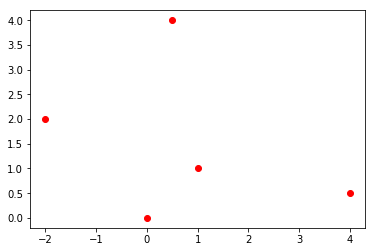

In [622]:
import matplotlib.pyplot as plt

points = [(0, 0), (1, 1), (0.5, 4), (4, 0.5), (-2, 2)] 
plt.plot([x[0] for x in points], [x[1] for x in points], 'ro')
plt.show()


Visually the points (0, 0) and (1, 1) appear to be closest. Just like in case of 1-D let us sort these points by x axis and then by y axis. Thus we get a couple of copies of the original array.

In [623]:
px = sorted(points, key = lambda x: x[0])
py = sorted(points, key = lambda x: x[1])
print('px:', px, 'py:', py)

px: [(-2, 2), (0, 0), (0.5, 4), (1, 1), (4, 0.5)] py: [(0, 0), (4, 0.5), (1, 1), (-2, 2), (0.5, 4)]



From the above output, we see that the in px and py, the points sorted by x and y corrdinates, the closest pair of points (0, 0) and (1, 1) do not appear consecutively.

Our divide and conquer algorithm in 2-D space essetntally does the following

1. Define a function ``ClosestPair`` that accepts two inputs, $p_x$ and $p_y$, the points sorted by x and y coordinates respectively.
2. Define the following four arrays
  - $l_x$: The Left half of $p_x$
  - $r_x$: The Right half of $p_x$
  - $l_y$: The Left half of $p_x$, sorted by their occurance in $p_y$
  - $r_y$: The Right half of $p_x$, sorted by their occurance in $p_y$
3. Recursively call ``ClosestPair`` twice by passing $l_x, l_y$ and $r_x, r_y$ to find two pair of points $(l_1, l_2)$ and $(r_1,r_2)$, the closest points on the left and right half respectively.
4. We then implement a fuction to find the closes points split in left and right. This is the most challenging bit which we will see later. This function called ``ClosestSplitPair`` returns the pair of points closest to each other but split in left and right halves. We call these points $(s_1, s_2)$
5. Return the closest from these three pair of points $(l_1, l_2), (r_1, r_2), (s_1, s_2)$

Now assuming that we implement the function ``CloseseSplitPair`` (point 4 above) in linear time, we can implement this entire algorithm in $O(nlogn)$ time as the analysis is very similar to the analysis of Merge sort where we split the input in two and make two recursive calls. Then perform linear work outside the recursive calls.

Implementing ``ClosestSplitPair`` is not very straightforward and require us to make a subtle change. The relaxed criteria now is that this function can return garbage if the overall closest split pair is present entirely either on the left or right and needs to return the correct answer only if the overall closest pair is split. With this relaxed criteria we now have

$$\delta := min\{d(l_1, d_2), d(r_1, r_2)\}\\
(s_1, s_2) = ClosestSplitPair(P_x, P_y, \delta)\\
return \: best\: of\: (l_1, l_2),\:(r_1, r_2),\:(s_1, s_2)
$$

The modified ``ClosestSplitPair`` works as follows

1. Find the right most point in left half of the points sorted by x coordinates. This becomes the median point. We call this point $\bar{x}$ and since the points are already sorted by x coordinate, this operation is done in $O(1)$.
2. We then filter points $S_y := \{q_1, q_2\dots q_l\}$ which are all points by doing a linear scan of $P_y$ and with their x coordinates between $\bar{x} - \delta$ and $\bar{x} + \delta$. Thus give is a thick strip of width $2\delta$ around the median $\bar{x}$. This operation takes linear time.
3. Next, we iterate through these points in $S_y$ and look no further than 7 points (or the last point in the list $S_y$, whichever is minimum) to and compute distance between them in Brute force, on each iteration we compare te distance with the best we have and continue in the loop. The upper bound of this loop iterations is $7n \leq 7n$ and thus this is a linear time operation and the entire ``ClosestSplitPair`` is a linear time operation.


Few question still are open.

- Why does this algorithm work and guarantees to return an answer
- Where did we get this number 7 in the step 3 of the above algorithm. We will now see a proof for the correctness of this algorithm

---
Proof of correctness of ``ClosestSplitPair``.

We start with the following Lemma

In the ``ClosestSplitPair``, suppose (p, q) are the closest split pair with $d(p, q) < \delta$, then 

- p and q will be included in the set $S_y$
- at most 6 points of $S_y$ have a y coordinate in between p and q, or in other words, p and q are not separated by more than 6 points between them in $S_y$


The following corollary this follows, if (p, q) is a split pair such that $d(p, q) < \delta$, then in the ``ClosestSplitPair`` algorithm, the points p and q, by above Lemma, are guaranteed to be present in $S_y$ and are no do not have more than 6 points separating them. Since the routine performs am exhaustive search and satisfies both these conditions, the ``ClosestSplitPair`` thus indeed find the correct points.

We will now prove the Lemma we stated earlier. We will prove the two claims one by one. The first one is simple of the two.

**p and q will be included in the set $S_y$**

*Proof*:

* $p = (x_1, y_1),\:q = (x_2, y_2)$ and $\delta $ is the minimum of the distance between points on the left of right. The value $\bar{x}$ is the median, or the **right most** x value of the left half.
* Since p and q are split with p in left half and q in right half we can conclude that $x_1 \leq \bar{x} < x_2$
* $\delta > d(p, q) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} \geq \sqrt{max\{|x_1 - x_1|, |y_1 - y_2| \}}$, thus we can say $|x_1 - x_2|, |y_1 - y_2| < \delta$
* Since $x_1 \leq \bar{x}$ and $x_2$ is no more than $\delta$ bigger than $x_1$, we can say $x_2 \leq \bar{x} + \delta$
* Similarly, $x_2 > \bar{x}$ and is no more than $\delta$ bigger than $x_2$, we can say $x_1 \geq \bar{x} - \delta$
* Thus $x_1 - \delta \leq \bar{x} \leq x_2 - \delta$, another way of thing about it as follows. Suppose two people are tied with a rope of length delta, then the maximum they can travel around $\bar{x}$ is, $\bar{x} - \delta$ and $\bar{x} + \delta$

**In the set $S_y$, there are no more than 6 points separating the true closest points, p and q**

*Proof*:

To prove this point let us draw 8 boxes, each box of size $\delta / 2$. 4 boxes will be stacked in a grid of $2\times 2$ on each side of the $\bar{x}$. The points p and q are split and are present on either side of $\bar{x}$. From above proof, we know that both these points are present in $S_y$ and their x coordinates are between $\bar{x} - \delta$ and $\bar{x} + \delta$. From above proof we know that both points p and q also satisfy the condition $|x_1 - x_2|, |y_1 - y_2| < \delta$

Suppose we draw the boxes such that the lower edge of the lower box passes through the point whose y coordinate is minimum of the two points p and q, then the points p and q will appear in one of the 4 boxes on either side of $\bar{x}$.

How many points can these 8 boxes hold? Let us assume  that a box(each of size $\delta / 2 \times \delta/2$) can hold multiple points. The fartest these points can be placed is when they are kept on diagonally opposite corners of this box. By pythagoras theorem, the distance between these points is is $\sqrt{2}\cdot \delta / 2 = \delta / \sqrt{2}\: <\: \delta $. Since each box lies entirely on the left of right of $\bar{x}$, and $\delta$ is the minimum of the distance between a pair of points on left of right, we can say that no box, each of size $\delta / 2 \times \delta /2$ can contain more than 1 point in it. Since these two points p and q also exist in one of the 8 boxes, we cannot have more than these remaining 6 points between these two points p and q


---

Let us implement the ``FastPower`` function and analyse its time complexity and the finally implement the ``ClosestPair`` algorithm in python





In [624]:
def fastpower(a, b):
    if b == 1:
        return a
    else:
        res = fastpower(a * a, b // 2)
        return res if b % 2 == 0 else res * a
            

In [625]:
print('2^1 =',fastpower(2, 1))
print('3^2 =',fastpower(3, 2))
print('4^3 =',fastpower(4, 3))
print('5^11 =',fastpower(5, 11))

2^1 = 2
3^2 = 9
4^3 = 64
5^11 = 48828125



On each recursive call of fastpower, the value of b halves. Thus the number of times fastpower is called is $log(b)$ times and thus the time complexity of the above function is $O(log(b))$. The log is technically of base 2 but since this is the Big-Oh notation thats not important. On the other hand the simple approach to multiply a b times will have the time complexity $O(b)$



In [626]:
from math import sqrt

def euclidean(p1, p2):
    return sqrt(pow(abs(p1[0] - p2[0]), 2) + pow(abs(p1[1] - p2[1]), 2))
  
def ClosestSplitPair(sy, best, delta):
    if len(sy) > 1:
        for i in range(len(sy)):
            for j in range(i + 1, min(7, len(sy) - i)):
                dist = euclidean(sy[i], sy[j])
                if dist < delta:
                    delta = dist
                    best = (sy[i], sy[j])
    return best, delta
    
def ClosestPair(px, py): 
    if len(px) <= 3:
        delta  = float('inf')
        best = (None, None)
        #Bruteforce if the length comes to 2 or 3 
        for i in range(len(px)):
            for j in range(i + 1, len(px)):
                dist = euclidean(px[i], px[j])
                if dist < delta:
                    delta = dist
                    best = (px[i], px[j])
                
        return best, delta
    
        
    lpx = px[0:(len(px) // 2)]
    rpx = px[(len(px) // 2):]
    lpy = [x for x in py if x in lpx]
    rpy = [x for x in py if x in rpx] #Succinct, but the composition runs in quadratic time.
    l, ld = ClosestPair(lpx, lpy)
    r, rd = ClosestPair(rpx, rpy)
    best, delta = (l, ld) if ld < rd else (r, rd)
    median = px[len(px) // 2]
    sy = [x for x in py if x[0] + delta >= median[0] or median[0] + delta >= x[0]]
    s, sd = ClosestSplitPair(sy, best, delta)
    return (best, delta) if delta < sd else (s, sd)
    

In [627]:
(p1, p2), mindist = ClosestPair(px, py)
print('Point 1:', p1, 'Point 2:', p2, 'Min distance:', mindist)

Point 1: (0, 0) Point 2: (1, 1) Min distance: 1.4142135623730951


Based on the 5 points we have, this does seem to be a right answer. We donot have an exhaustive test set to test our implementation.

---

#### Problem 3.2
Given a Unimodal array of unique numbers(values sorted in ascending order followed by values in descending order), the goal is to find the maximum element in $O(log\:n)$ time

In [628]:
def max_in_unimodal(array):
    if len(array) == 1:
        return array[0]
    if len(array) == 2:
        return max(array[0], array[1])
    m = len(array) // 2
    if array[m - 1] < array[m] and array[m] < array[m + 1]:
        #Increasing sequence, continue on right
        return max_in_unimodal(array[m + 1 :])
    elif array[m - 1] > array[m] and array[m] > array[m + 1]:
        #Decreasing sequence, look on left
        return max_in_unimodal(array[0: m])
    else:
        return array[m]
        

In [629]:
print('max_in_unimodal([1, 2, 3, 4, 3, 2]) gives', max_in_unimodal([1, 2, 3, 4, 3, 2]))
print('max_in_unimodal([1]) gives', max_in_unimodal([1]))
print('max_in_unimodal([1, 2]) gives', max_in_unimodal([1, 2]))
print('max_in_unimodal([2, 1]) gives', max_in_unimodal([2, 1]))
print('max_in_unimodal([1, 2, 3, 4, 5]) gives', max_in_unimodal([1, 2, 3, 4, 5]))

max_in_unimodal([1, 2, 3, 4, 3, 2]) gives 4
max_in_unimodal([1]) gives 1
max_in_unimodal([1, 2]) gives 2
max_in_unimodal([2, 1]) gives 2
max_in_unimodal([1, 2, 3, 4, 5]) gives 5


---

#### Problem 3.3

Given a sorted array of n distinct integers which can be positive, negative or zero, we want to decide if there is an index i such that A[i] = i in fastest possible time.


In [630]:
def does_value_equal_index(array, reduced_on_left = 0):
    if len(array) == 0:
        return False
    else:
        m = len(array) // 2
        diff = array[m] - m - reduced_on_left
        if diff < 0:
            #No smaller number will have a[i] == 1, look right, also pass the number of elements reduced on left
            return does_value_equal_index(array[m + 1:], reduced_on_left + m + 1)
        elif diff > 0:
            #No possible to have a[i] == 1 on right, look on left, number reduced on the left did not change 
            return does_value_equal_index(array[0:m], reduced_on_left)
        else:
            return True
        
        

In [631]:
print('does_value_equal_index([-5, -4, -3, -2]) returns ', does_value_equal_index([-5, -4, -3, -2]))
print('does_value_equal_index([-5, -4, 2, 10]) returns ', does_value_equal_index([-5, -4, 2, 10]))
print('does_value_equal_index([-5, -4, 1, 10]) returns ', does_value_equal_index([-5, -4, 1, 10]))
print('does_value_equal_index([1, 2, 3]) returns ', does_value_equal_index([1, 2, 3]))
print('does_value_equal_index([-1, 0, 1, 2, 4, 5, 7]) returns ', does_value_equal_index([-1, 0, 1, 2, 4, 5, 7]))

does_value_equal_index([-5, -4, -3, -2]) returns  False
does_value_equal_index([-5, -4, 2, 10]) returns  True
does_value_equal_index([-5, -4, 1, 10]) returns  False
does_value_equal_index([1, 2, 3]) returns  False
does_value_equal_index([-1, 0, 1, 2, 4, 5, 7]) returns  True



The complexity of the above function is $O(log\: n)$ as we reduce the array in half as we proceed in each recursive call.


---

#### Problem 3.4

Find local minima of an $n \times n$ matrix by performing $O(n)$ comparison.

We will see two implementations, an easy one which does $O(nlog\: n)$ comparisons and performs reasonably well. Another one is an implementation that does linear number of comparisons.

We will use numpy to store matrices as it becomes easy to slice. Following is a simple and an implementation with $O(nlog\: n)$ time guarantee

In [632]:
import numpy as np

#Assumption is that the matrix has unique numbers
def localminima1(matrix):
    m = matrix.shape[1] // 2  #Num cols
    i_minval = np.argmin(matrix[:,m])      # Done in O(n)
    min_val = matrix[i_minval, m]
    #Comparison done in constant time, the recursive calls would be done log n times
    left_val = matrix[i_minval, m - 1] if m > 0 else float('inf')
    right_val = matrix[i_minval, m + 1] if m < matrix.shape[1] - 1 else float('inf')
    if min_val < left_val and min_val < right_val:
        return (m, i_minval)
    else:
        return localminima1(matrix[:, 0:m]) if left_val < min_val else localminima1(matrix[:, (m + 1):])


In [633]:
array = np.matrix([[1, 2, 5, 4], [0, -2, 9, 6], [7, -1, 3, 10], [11, 12, 13, 14]])
print('Input is\n',array)
ix = localminima1(array)
print('\nA local minima is at', ix, 'with value', array[ix])

Input is
 [[ 1  2  5  4]
 [ 0 -2  9  6]
 [ 7 -1  3 10]
 [11 12 13 14]]

A local minima is at (1, 1) with value -2


In [634]:
import numpy as np

#Use window to find the minimum value and then find the recursively find the local minima in a quadrant.
#For simplicity I assume the matrix is square
#We find the minumum in a window. A window for a matrix is as follows,
#  ***********
#  *----*----*
#  *----*----*
#  ***********
#  *----*----*
#  *----*----*
#  ***********
#
# All elements denoted by star form a part if window.
# We find the minimum value from this window and check if thats a local minima. If, it isn't,
# recursively repeat this operation on one of the quadrants


def min_idx_in_window(matrix):
    #Find the index of the minimum element in the window of the matrix
    #top, bottom, left, right, mid_hor, mid_ver], 
    #Its a linear time operation
    r, c =matrix.shape
    ix = [
     (0, np.argmin(matrix[0,:])), #Index if min in top row
     ( r - 1, np.argmin(matrix[-1,:])), #Index of min in bot row
     (np.argmin(matrix[:,0]), 0), #Index of min on left
     (np.argmin(matrix[:, -1]), c -1), #Index of min on right 
     (r // 2, np.argmin(matrix[r // 2, :])), #Index of min in horizontal strip in middle
     (np.argmin(matrix[:, c // 2]), c // 2) #Index of min in vertical strip in middle
    ]
    ix_minof_min = np.argmin([matrix[i] for i in ix])
    ix_min = ix[ix_minof_min]
    return ix_min
    

def is_local_minima(matrix, ix):
    #Tests if the given index a local minima in the given matrix, its a constant time operation
    nrows, ncols = matrix.shape
    minval = matrix[ix]
    left = matrix[ix[0] - 1, ix[1]] if ix[0] > 0 else float('inf')
    right = matrix[ix[0] + 1, ix[1]] if (ix[0] + 1) < nrows  else float('inf')
    top = matrix[ix[0], ix[1] - 1] if ix[1] > 0 else float('inf')
    bot = matrix[ix[0], ix[1] + 1] if (ix[1] + 1) < ncols  else float('inf')
    return minval < left and minval < right and minval < top and minval < bot
 
def get_quadrant_to_recurse(matrix, min_ix, dr, dc):
    #From this min_ix, find the adjacent value not in window to find the quadrant it is in.
    #the method also finds the delta for the row and col. This is needed to locate the current position of quadrant
    #in the entire matrix as the final coordinates to return are the ones in the original matrix.
    ri, ci = min_ix
    n_rows, n_cols = matrix.shape
    min_val = matrix[min_ix]
    if ri == 0: #Top row, 
        #Since there is only one neighbor and the value at min_ix is not local minima, the value
        #underneath will be less than the value a min_ix and thus we have quadtants as one of the top 
        quadrant = 1 if ci < n_cols // 2 else 2
    elif ri == (n_rows - 1): #bottom row, 
        quadrant = 3 if ci < n_cols // 2 else 4
    elif ci == 0: # Left edge
        quadrant = 1 if ri < n_rows // 2 else 3

    elif ci == (n_cols - 1): # right edge
        quadrant = 2 if ri < n_rows // 2 else 4
        
    elif ri == n_rows //2: ## Horizontal slice if window
        if ci < n_cols // 2:
            quadrant = 1 if matrix[ri - 1, ci] < min_val else 3
        else:
            quadrant = 2 if matrix[ri - 1, ci] < min_val else 4
    elif ci == n_cols // 2: ## Vertical slice of window
        if ri < n_rows // 2:
            quadrant = 1 if matrix[ri, ci - 1] < min_val else 2
        else:
            quadrant = 3 if matrix[ri, ci - 1] < min_val else 4

    if quadrant == 1:
        return matrix[1:(n_rows //2), 1:(n_cols //2)], dr + 1, dc + 1
    elif quadrant == 2:
        return matrix[1:(n_rows //2), n_cols // 2 + 1:-1], dr + 1, dc + n_cols // 2 + 1
    elif quadrant == 3:
        return matrix[(n_rows // 2 + 1):-1, 1:(n_cols //2)], dr + n_rows // 2 + 1, dc + 1
    elif quadrant == 4:
        return matrix[(n_rows // 2 + 1):-1, n_cols // 2 + 1:-1], dr + n_rows // 2 + 1, dc + n_cols // 2 + 1
    
    

def localminima11(matrix, dr = 0, dc = 0):
    ncols = matrix.shape[1]
    nrows = matrix.shape[0]
    #For row of col vectors, the min is the local minima.
    if nrows == 1:
        return (dr, dc + np.argmin(matrix))
    elif ncols == 1:
        return (dr + np.argmin(matrix), dc)    
    
    min_win_idx = min_idx_in_window(matrix)
    return min_win_idx if is_local_minima(matrix, min_win_idx) else localminima11(* get_quadrant_to_recurse(matrix, min_win_idx, dr, dc))
    

---

#### Problem 3.5

Already implemented and tested in the Notebook earlier

In [635]:
array = np.matrix([[1, 2, 5, 4], [0, -2, 9, 6], [7, -1, 3, 10], [11, 12, 13, 14]])
print('Input is\n',array)
ix = localminima1(array)
print('\nA local minima is at', ix, 'with value', array[ix])

Input is
 [[ 1  2  5  4]
 [ 0 -2  9  6]
 [ 7 -1  3 10]
 [11 12 13 14]]

A local minima is at (1, 1) with value -2


---

TODO: Prepare some test data for test of local minima implementation

---

An informal proof for the running time of the algorithm implemented in function ``localminima11`` is as follows

- For a given matrix of size n we work on $6n$ (the elements in the window) to find the minimum
- The operation to check if the minimum element in the window is a local minima is a constant time operation.
- If not, we recursively perform the operation in point 1 on a $\frac{n}{2}\times \frac{n}{2}$ array.
- Thus for a very large n we perform the following number of operations

$6\cdot n + 6\cdot \frac{n}{2} + 6\cdot \frac{n}{4} \dots \: = 6\cdot n (1 + \frac{1}{2} + \frac{1}{4} \dots) \leq 6n\cdot 2 = 12\cdot n$

